In [89]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

class data:
    
    def __init__(self, filepath: str):
        self.filepath = filepath
        self.data = None
        self.climate = None
        self.mk_result =None

    def import_data(self):
        self.data = pd.read_csv(self.filepath)
        self.climate = self.data.columns[-1]
        return self.data

    def calculate_annual_average(self, is_accum = False):

        if self.data is None:
            raise ValueError("Data not loaded. Call load_data() first.")
        
        if is_accum: 
            self.yearly_avg = (
                self.data.groupby(["DOY","YEAR"]).mean().groupby("YEAR")[self.climate].sum().reset_index()
            )

        else:
            self.yearly_avg = (
                self.data.groupby("YEAR")[self.climate].mean().reset_index()
            )    

        return self.yearly_avg
    
    def trend_experiment(self):

        series = self.yearly_avg[self.yearly_avg.columns[-1]].values
        self.mk_result = mk.original_test(series)

        print("Mann-Kendall Test Result:")
        print("------------------------")
        print(f"Trend       : {self.mk_result.trend}")
        print(f"Significant : {self.mk_result.h}")
        print(f"P-value     : {self.mk_result.p:.4f}")
        print(f"Sen's slope : {self.mk_result.slope:.4f}")

    def plot_trend(self):
        """
        ****GPT generated -> plot the data
        Plot yearly averages and overlay Sen’s slope trend line.
        """
        if self.yearly_avg is None:
            raise ValueError("Yearly averages not computed. Call compute_yearly_average() first.")
        if self.mk_result is None:
            raise ValueError("Run mann_kendall_test() first to compute Sen’s slope.")

        # Extract data
        years = self.yearly_avg["YEAR"]
        y = self.yearly_avg[self.yearly_avg.columns[-1]]
        idx = range(len(years))

        # Base lineplot
        plt.figure(figsize=(8, 5))
        sns.lineplot(x=years, y=y, marker="o", label=f"Yearly Avg {self.climate}")

        # Add Sen’s slope line
        slope = self.mk_result.slope
        intercept = self.mk_result.intercept
        trend_line = slope * pd.Series(idx) + intercept
        plt.plot(years, trend_line, color="red", linestyle="--", label="Sen’s Slope Trend")

        # Style
        plt.title(f"Yearly Average {self.climate}")
        plt.xlabel("Year")
        plt.ylabel(self.climate)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def run_annual_experiments(self, is_accum = False):
        self.calculate_annual_average(is_accum)
        self.trend_experiment()
        self.plot_trend()


Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.5262
Sen's slope : 0.0003


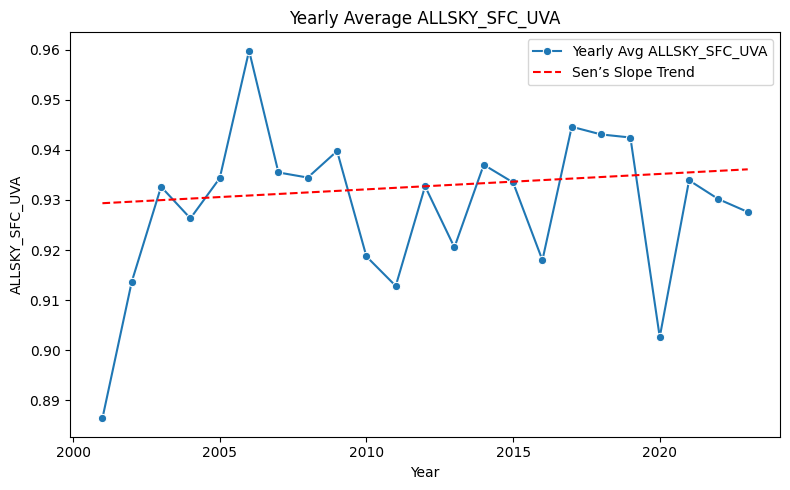

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.2244
Sen's slope : 0.0000


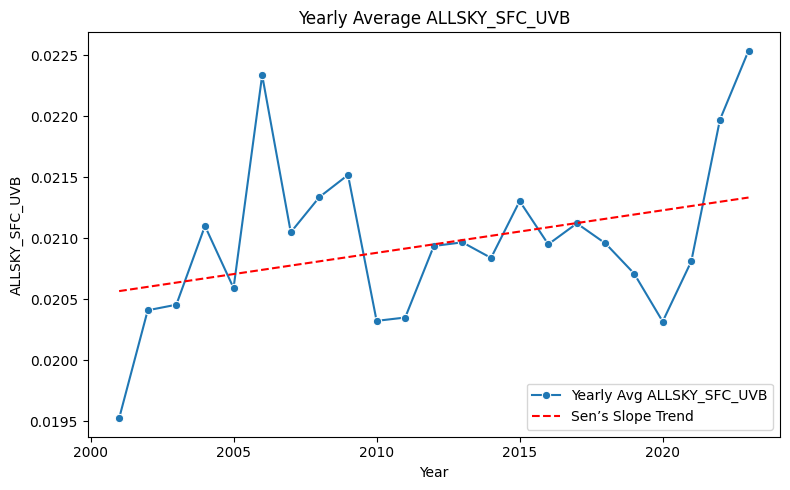

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.1991
Sen's slope : -0.0055


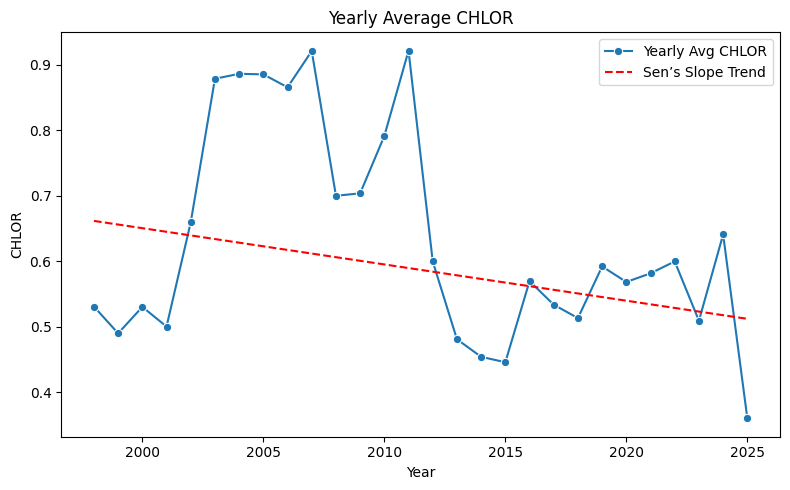

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.3531
Sen's slope : -0.0035


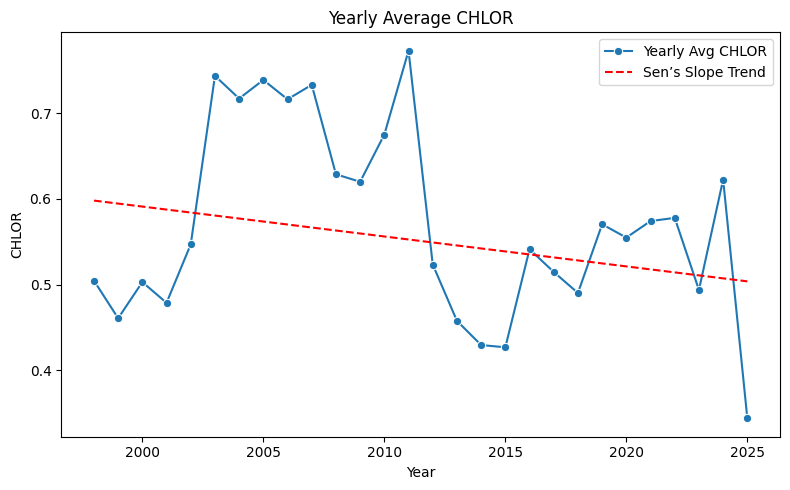

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.0837
Sen's slope : -3.8569


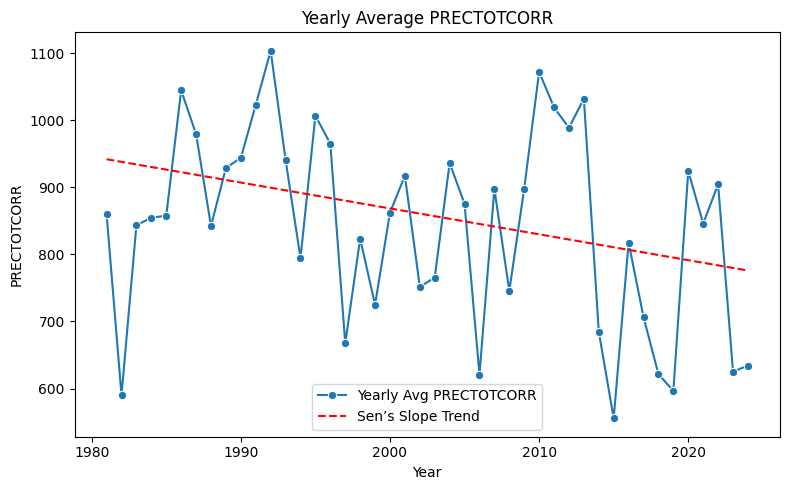

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.0734
Sen's slope : -0.0249


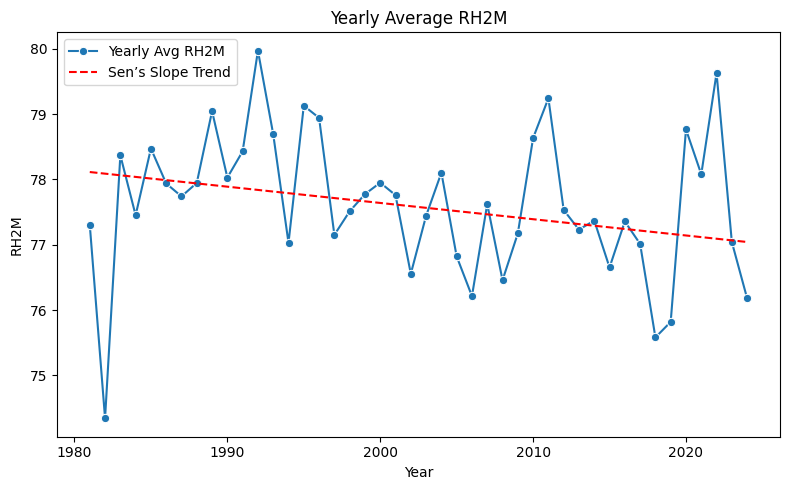

Mann-Kendall Test Result:
------------------------
Trend       : increasing
Significant : True
P-value     : 0.0002
Sen's slope : 0.0191


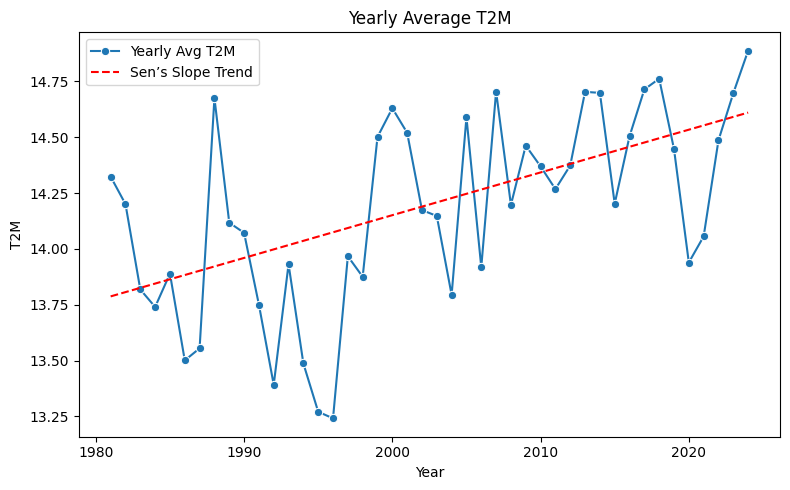

Mann-Kendall Test Result:
------------------------
Trend       : increasing
Significant : True
P-value     : 0.0004
Sen's slope : 0.0209


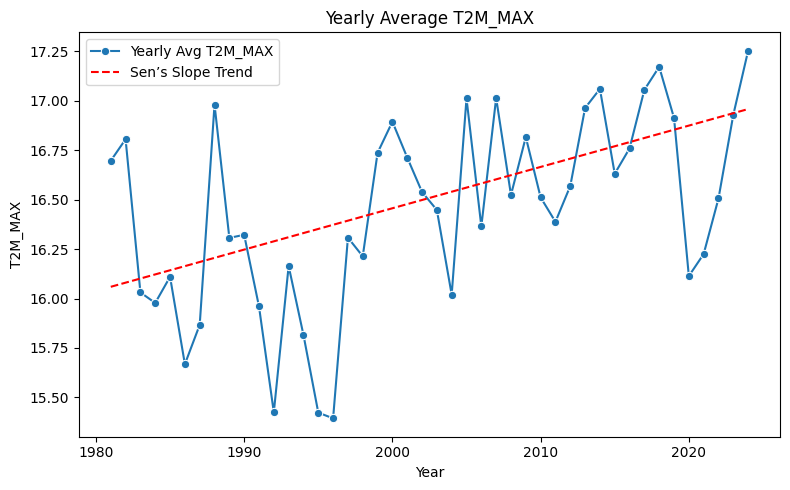

Mann-Kendall Test Result:
------------------------
Trend       : increasing
Significant : True
P-value     : 0.0000
Sen's slope : 0.0219


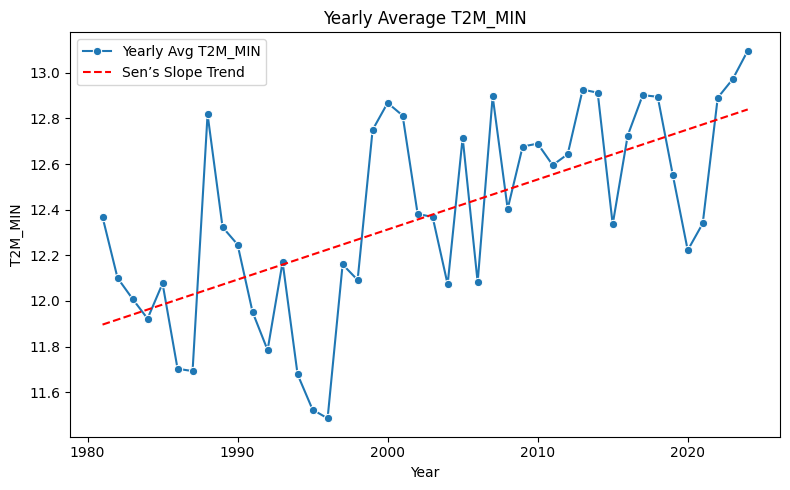

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.6490
Sen's slope : 0.0442


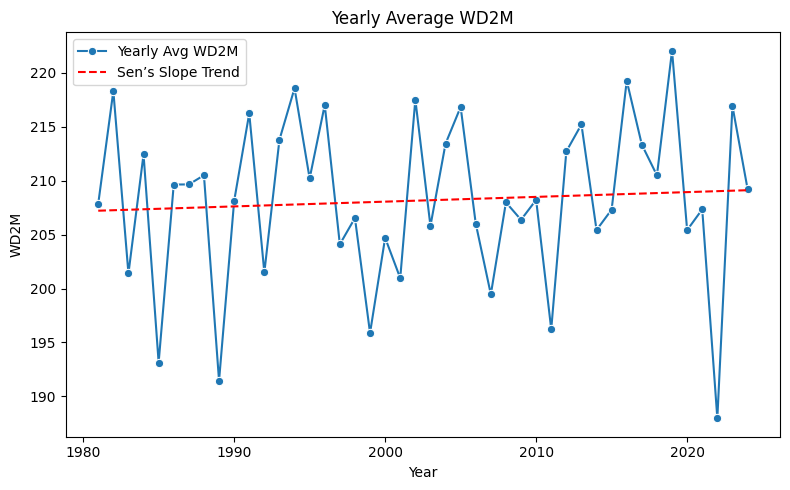

Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.4481
Sen's slope : 0.0015


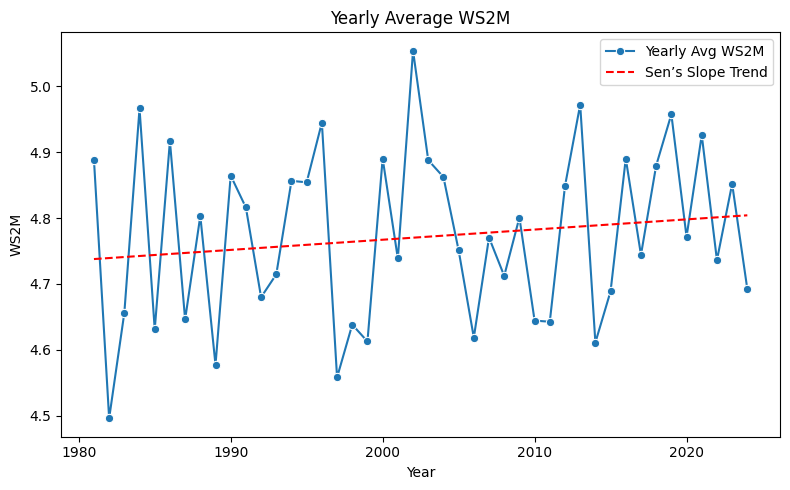

In [97]:
variables = ['ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB',
 'CHLOR_M',
 'CHLOR_W',
 'PRECTOTCORR',
 'RH2M',
# 'SST',
 'T2M',
 'T2M_MAX',
 'T2M_MIN',
 'WD2M',
 'WS2M']

for var in variables:
    path = rf'D:\Data-analysis-of-Climate-Change-in-Phillip-Island\resources\{var}\complete_dataset_{var}.csv'
    experiment = data(path)
    experiment.import_data()
    if var == 'PRECTOTCORR':
        experiment.run_annual_experiments(is_accum=True)
    else:
        experiment.run_annual_experiments()